# 1 - Write a loss function that can be used for each of the models below.

### L1-Regularized Linear Regression:
$$J = \frac{1}{n} \sum\limits_{i = 1}^{n} \left(\large f\left(x_i, W\right) - y_i \large  \right)^{2} + \lambda\sum\limits_{i = 1}^{m}|w_i|$$

$$ Where, \large f\left(x_i, W\right) = w_0 + w_1x_1 + w_2x_2 + ... + w_nx_n \large$$

$$ \large x_i = \text{feature vector} ; y_i = \text{target vector} ; W = \text{weight vector} \large$$

$$ \large n = \text{number of data points} ; m = \text{number of weights} ;  \lambda = \text{parameter controls how strong the penalty is in regularization} \large $$

### L2-Regularized Logistic Regression:
$$ \large -\sum\limits_{i=1}^{n}\sum\limits_{j=1}^{m} y_{i,j}log\left(P_{i,j}\right) + \lambda\sum\limits_{i=1}^{n}\sum\limits_{j = 1}^{m} W_{i,j}^{2}$$

$$ \large y_{i,j} = \text{target vector} ; P_{i,j} = \text{the probability of } i^{th} \text{data points being } j^{th} \text{class} ; W_{i,j} = \text{weight vector} \large$$

$$ \large n = \text{number of data points} ; m = \text{number of classes} \large ;  \lambda = \text{parameter controls how strong the penalty is in regularization}$$

# 2 - Which logistic regression model (unregularized, L2, or L1) and parameters (lambda high or low) may be more useful for determining a small set of parameters that are most important for classification?

I will choose L1 logistic regression model because the weight of unrelated features will be set to zero (feature reduction).
Also, I will choose lambda high because high lambda value strengthens the regularization effect and decreases the model complexity.

# For questions 3-7

# 3 - Examine the training and validation data and decide on a metric to determine the performance of your models. Please provide the reason(s) of your choice.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Data

In [2]:
df_train = pd.read_csv('/Users/chenjiqing/Public/2022_Spring_term/QBS108 Applied ML/2022 file/Homework 1/datasets/train_diabetes.csv')
df_train = df_train.drop('Unnamed: 0',axis=1)
df_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,114,88,0,0,27.8,0.247,66,0
1,9,123,70,44,94,33.1,0.374,40,0
2,4,115,72,0,0,28.9,0.376,46,1
3,4,85,58,22,49,27.8,0.306,28,0
4,5,97,76,27,0,35.6,0.378,52,1
...,...,...,...,...,...,...,...,...,...
455,4,141,74,0,0,27.6,0.244,40,0
456,4,142,86,0,0,44.0,0.645,22,1
457,1,189,60,23,846,30.1,0.398,59,1
458,3,124,80,33,130,33.2,0.305,26,0


In [3]:
df_train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000,460.000000
mean,3.863043,122.089130,70.006522,20.930435,82.760870,32.378478,0.457661,33.504348,0.330435
std,3.295991,32.022641,17.907106,15.898355,116.823701,7.274589,0.332795,11.816590,0.470882
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.400000,0.245750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,45.000000,32.250000,0.348000,29.000000,0.000000
75%,6.000000,142.250000,80.000000,32.000000,130.000000,36.600000,0.591500,40.250000,1.000000
max,14.000000,197.000000,114.000000,99.000000,846.000000,59.400000,2.420000,81.000000,1.000000


In [4]:
df_val = pd.read_csv('/Users/chenjiqing/Public/2022_Spring_term/QBS108 Applied ML/2022 file/Homework 1/datasets/val_diabetes.csv')
df_val = df_val.drop('Unnamed: 0',axis=1)
df_val

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,7,125,86,0,0,37.6,0.304,51,0
1,7,194,68,28,0,35.9,0.745,41,1
2,1,121,78,39,74,39.0,0.261,28,0
3,0,117,0,0,0,33.8,0.932,44,0
4,1,151,60,0,0,26.1,0.179,22,0
...,...,...,...,...,...,...,...,...,...
149,8,95,72,0,0,36.8,0.485,57,0
150,3,96,56,34,115,24.7,0.944,39,0
151,3,107,62,13,48,22.9,0.678,23,1
152,9,156,86,28,155,34.3,1.189,42,1


In [5]:
df_val.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000,154.000000
mean,3.824675,119.714286,67.292208,20.461039,73.233766,31.818182,0.514130,33.168831,0.409091
std,3.566608,30.936941,21.701759,16.427354,112.384017,7.449196,0.335402,11.476492,0.493270
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.088000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.240250,24.000000,0.000000
50%,3.000000,119.000000,70.000000,24.000000,0.000000,32.550000,0.414000,28.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,113.000000,36.225000,0.686750,41.000000,1.000000
max,17.000000,199.000000,122.000000,60.000000,545.000000,53.200000,1.699000,69.000000,1.000000


In [6]:
df_test = pd.read_csv('/Users/chenjiqing/Public/2022_Spring_term/QBS108 Applied ML/2022 file/Homework 1/datasets/test_diabetes.csv')
df_test = df_test.drop('Unnamed: 0',axis=1)
df_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,74,0,0,0,0.0,0.102,22,0
1,2,90,68,42,0,38.2,0.503,27,1
2,0,162,76,36,0,49.6,0.364,26,1
3,13,153,88,37,140,40.6,1.174,39,0
4,1,172,68,49,579,42.4,0.702,28,1
...,...,...,...,...,...,...,...,...,...
149,0,152,82,39,272,41.5,0.270,27,0
150,0,129,110,46,130,67.1,0.319,26,1
151,2,88,74,19,53,29.0,0.229,22,0
152,2,158,90,0,0,31.6,0.805,66,1


#### We can see the Outcomes of the training and validation data are imbalanced (skewed dataset) so I would not used accuracy as a metric to determine the performance.
#### Although precision and recall are good candidates for skewed dataset to determine the performance of model, I prefer a conservative metric and don't want over-estimate the strength of my model. As a result, I will choose F1-score as a metric to determine the performance.

### Data Clean

In [7]:
# Set features and target
X_train = df_train.drop(['Outcome'], axis=1).copy()
y_train = df_train['Outcome'].copy()

X_val = df_val.drop(['Outcome'], axis=1).copy()
y_val = df_val['Outcome'].copy()

X_test = df_test.drop(['Outcome'], axis=1).copy()
y_test = df_test['Outcome'].copy()

#Standardization
from sklearn.preprocessing import RobustScaler

RS = RobustScaler()
X_train_RS = RS.fit_transform(X_train)
X_val_RS = RS.transform(X_val)
X_test_RS = RS.transform(X_test)

In [8]:
X_train_RS

array([[ 0.6       , -0.07100592,  1.        , ..., -0.48369565,
        -0.29211858,  2.27692308],
       [ 1.2       ,  0.14201183, -0.125     , ...,  0.0923913 ,
         0.07519884,  0.67692308],
       [ 0.2       , -0.04733728,  0.        , ..., -0.36413043,
         0.08098337,  1.04615385],
       ...,
       [-0.4       ,  1.70414201, -0.75      , ..., -0.23369565,
         0.14461316,  1.84615385],
       [ 0.        ,  0.16568047,  0.5       , ...,  0.10326087,
        -0.12436732, -0.18461538],
       [ 0.4       , -0.68639053,  0.375     , ..., -0.50543478,
        -0.26030369,  0.49230769]])

# 4 - In this part, you are asked to implement a program for logistic regression from scratch.

## Implement a L2-regularized logistic regression model to train stochastic gradient descent to return the loss from 500 epochs of training

In [9]:
# sigmoid function
def sigmoid(a):
    ans = 1/(1+np.exp(-a))
    return ans

# loss function
def J_loss(sample_numbers, y_true, y_probability, lambda_L2, weight):
    loss = -1/sample_numbers * sum((y_true*np.log(y_probability)) + (1- y_true) * np.log(1-y_probability)) + (lambda_L2 / (2 * sample_numbers)) * np.sum(np.square(weight))
    return loss

sample_numbers, feature_numbers = X_train_RS.shape
weight = np.ones(feature_numbers)
learning_rate = 0.0001
lambda_L2 = 0.0001
epochs = 500
train_loss = []
val_loss = []

In [10]:
for epoch in range(1,epochs+1):
    if epoch == 1:
        for i in range(sample_numbers):
            weight = weight - learning_rate* ((sigmoid(np.dot(weight.T, X_train_RS[i]))-y_train[i])*X_train_RS[i])
    else:
        for i in range(sample_numbers):
            weight = weight - learning_rate* ((sigmoid(np.dot(weight.T, X_train_RS[i]))-y_train[i])*X_train_RS[i] + lambda_L2*weight)
    
    # train loss
    y_prob_train = sigmoid(np.dot(weight,X_train_RS.T))
    loss_of_train = J_loss(X_train_RS.shape[0], y_train, y_prob_train, lambda_L2, weight)
    train_loss.append(loss_of_train)
    
    # validate loss
    y_prob_val = sigmoid(np.dot(weight,X_val_RS.T))
    loss_of_val = J_loss(X_val_RS.shape[0], y_val, y_prob_val, lambda_L2, weight)
    val_loss.append(loss_of_val)
    

## Plot the training and validation loss curves.

Text(0, 0.5, 'Loss')

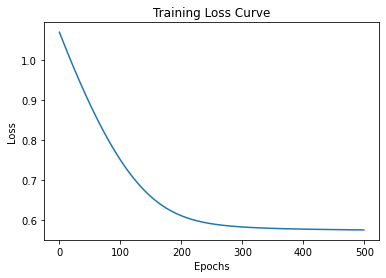

In [11]:
plt.plot(train_loss)
plt.title("Training Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

Text(0, 0.5, 'Loss')

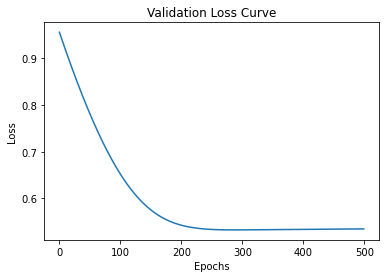

In [12]:
plt.plot(val_loss)
plt.title("Validation Loss Curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")

## Indicate which iteration gives the best model, and explain your decision.

In [13]:
Epoch_place_with_min_loss = val_loss.index(min(val_loss))
Epoch_place_with_min_loss

287

- 288th Epoch gives the best model because we can see the minimum loss showed up at 288th Epoch in Validation set.

## List and explain your hyperparameter choices (learning rate, regularization parameter).

When Learning Rate = 1


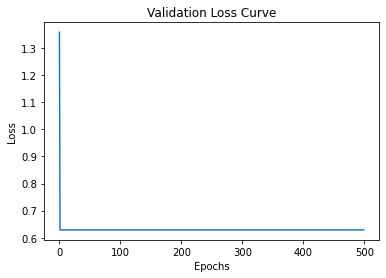

When Learning Rate = 0.01


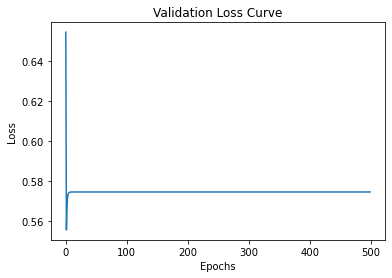

When Learning Rate = 0.0001


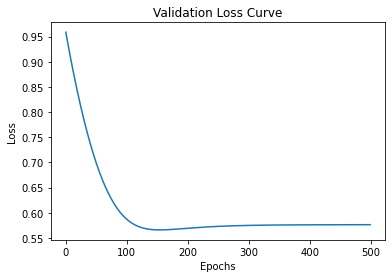

When Learning Rate = 1e-06


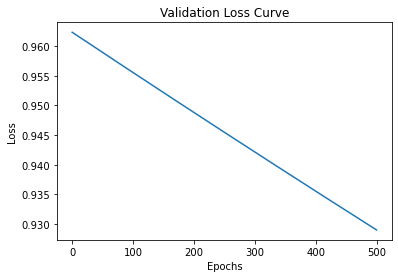

In [14]:
lambda_L2 = 0.1 # fix regularization parameter
weight = np.ones(feature_numbers)
epochs = 500
train_loss = []
val_loss = []

for learning_rate in [1, 0.01, 0.0001, 0.000001]:
    for epoch in range(1,epochs+1):
        if epoch == 1:
            for i in range(sample_numbers):
                weight = weight - learning_rate* ((sigmoid(np.dot(weight.T, X_train_RS[i]))-y_train[i])*X_train_RS[i])
        else:
            for i in range(sample_numbers):
                weight = weight - learning_rate* ((sigmoid(np.dot(weight.T, X_train_RS[i]))-y_train[i])*X_train_RS[i] + lambda_L2*weight)
    
        # validate loss
        y_prob_val = sigmoid(np.dot(weight,X_val_RS.T))
        loss_of_val = J_loss(X_val_RS.shape[0], y_val, y_prob_val, lambda_L2, weight)
        val_loss.append(loss_of_val)
    print('When Learning Rate =', learning_rate)
    plt.plot(val_loss)
    plt.title("Validation Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    weight = np.ones(feature_numbers)
    train_loss = []
    val_loss = []

- the learning rate determine how fast we update weights. If the learning is too large (in this case: 1 ~ 0.01), we may get sub-optimal weights and unstable model training. If the learning rate is too small (in my case: 0.000001), the loss decreased slowly and needs many interations to converge to the best weights. So I choose learning rate = 0.0001

When regularization parameter = 100


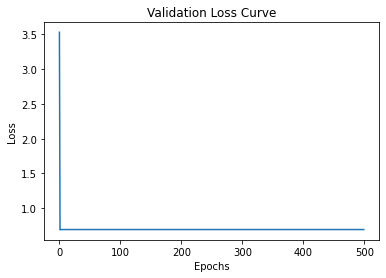

When regularization parameter = 10


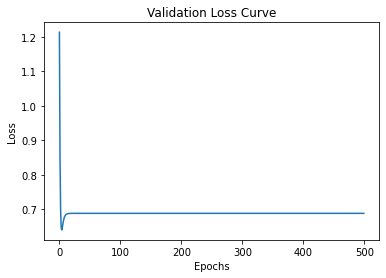

When regularization parameter = 1


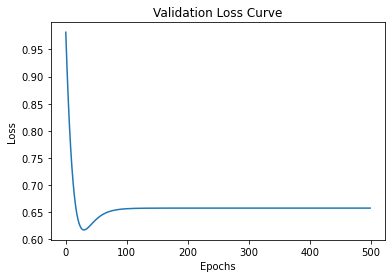

When regularization parameter = 0.1


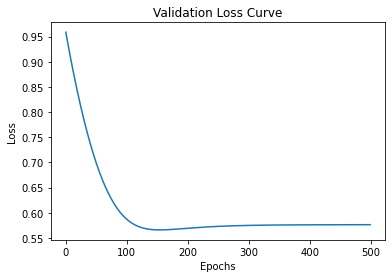

When regularization parameter = 0.0001


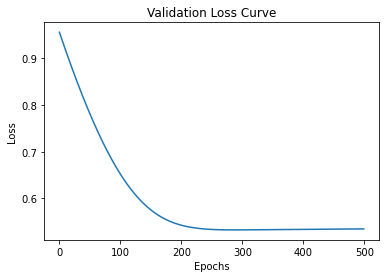

In [15]:
learning_rate = 0.0001 # fix learning rate
weight = np.ones(feature_numbers)
epochs = 500
train_loss = []
val_loss = []

for lambda_L2 in [100, 10, 1, 0.1, 0.0001]:
    for epoch in range(1,epochs+1):
        if epoch == 1:
            for i in range(sample_numbers):
                weight = weight - learning_rate* ((sigmoid(np.dot(weight.T, X_train_RS[i]))-y_train[i])*X_train_RS[i])
        else:
            for i in range(sample_numbers):
                weight = weight - learning_rate* ((sigmoid(np.dot(weight.T, X_train_RS[i]))-y_train[i])*X_train_RS[i] + lambda_L2*weight)
    
        # validate loss
        y_prob_val = sigmoid(np.dot(weight,X_val_RS.T))
        loss_of_val = J_loss(X_val_RS.shape[0], y_val, y_prob_val, lambda_L2, weight)
        val_loss.append(loss_of_val)
    print('When regularization parameter =', lambda_L2)
    plt.plot(val_loss)
    plt.title("Validation Loss Curve")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.show()
    weight = np.ones(feature_numbers)
    train_loss = []
    val_loss = []

- In here, we can see if the regularization parameter is too large, the cross-entropy loss would be unstable and fluctuate. So I decede to choose lambda = 0.0001

# 5 - Train a logistic regression on the data set with lambda = 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, and 0.9, using L2, L1, and Elastic net regularizations on the training and validation set. For elastic net, use an L1 ratio of 0.5. Determine the best lambda(s) and justify your decision

In [16]:
# Load Module
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, f1_score, accuracy_score, recall_score, confusion_matrix

### L1-regularized logistic regression model

In [17]:
lambda_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in lambda_values:
    print('L1-regularized logistic regression model; lambda = ',i)
    lr = LogisticRegression(solver = 'saga', penalty = 'l1',C = 1/i, random_state=0)
    lr.fit(X_train_RS, y_train)
    val_loss = log_loss(y_val,lr.predict_proba(X_val_RS))
    print('Loss of Validation Set:',val_loss)
    print('F1 Score:',f1_score(y_val,lr.predict(X_val_RS)))
    print('Accuracy:',accuracy_score(y_val,lr.predict(X_val_RS)))
    print('Sensitivity:',recall_score(y_val,lr.predict(X_val_RS)))
    tn, fp, fn, tp = confusion_matrix(y_val, lr.predict(X_val_RS)).ravel()
    print('Specificity:',(tn/(fp+tn)))
    print('')

L1-regularized logistic regression model; lambda =  0.1
Loss of Validation Set: 0.49304504067017546
F1 Score: 0.56
Accuracy: 0.7142857142857143
Sensitivity: 0.4444444444444444
Specificity: 0.9010989010989011

L1-regularized logistic regression model; lambda =  0.2
Loss of Validation Set: 0.49323294369460824
F1 Score: 0.5544554455445545
Accuracy: 0.7077922077922078
Sensitivity: 0.4444444444444444
Specificity: 0.8901098901098901

L1-regularized logistic regression model; lambda =  0.3
Loss of Validation Set: 0.49342504178892915
F1 Score: 0.5544554455445545
Accuracy: 0.7077922077922078
Sensitivity: 0.4444444444444444
Specificity: 0.8901098901098901

L1-regularized logistic regression model; lambda =  0.4
Loss of Validation Set: 0.49362129611482136
F1 Score: 0.5544554455445545
Accuracy: 0.7077922077922078
Sensitivity: 0.4444444444444444
Specificity: 0.8901098901098901

L1-regularized logistic regression model; lambda =  0.5
Loss of Validation Set: 0.4938216683830807
F1 Score: 0.55445544554

### L2-regularized logistic regression model

In [18]:
lambda_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in lambda_values:
    print('L2-regularized logistic regression model; lambda = ',i)
    lr = LogisticRegression(solver = 'saga', penalty = 'l2',C = 1/i, random_state=1)
    lr.fit(X_train_RS, y_train)
    val_loss = log_loss(y_val,lr.predict_proba(X_val_RS))
    print('Loss of Validation Set:',val_loss)
    print('F1 Score:',f1_score(y_val,lr.predict(X_val_RS)))
    print('Accuracy:',accuracy_score(y_val,lr.predict(X_val_RS)))
    print('Sensitivity:',recall_score(y_val,lr.predict(X_val_RS)))
    tn, fp, fn, tp = confusion_matrix(y_val, lr.predict(X_val_RS)).ravel()
    print('Specificity:',(tn/(fp+tn)))
    print('')

L2-regularized logistic regression model; lambda =  0.1
Loss of Validation Set: 0.4929888583158815
F1 Score: 0.56
Accuracy: 0.7142857142857143
Sensitivity: 0.4444444444444444
Specificity: 0.9010989010989011

L2-regularized logistic regression model; lambda =  0.2
Loss of Validation Set: 0.4931147737428717
F1 Score: 0.56
Accuracy: 0.7142857142857143
Sensitivity: 0.4444444444444444
Specificity: 0.9010989010989011

L2-regularized logistic regression model; lambda =  0.3
Loss of Validation Set: 0.49324135486517534
F1 Score: 0.56
Accuracy: 0.7142857142857143
Sensitivity: 0.4444444444444444
Specificity: 0.9010989010989011

L2-regularized logistic regression model; lambda =  0.4
Loss of Validation Set: 0.49336857311563387
F1 Score: 0.56
Accuracy: 0.7142857142857143
Sensitivity: 0.4444444444444444
Specificity: 0.9010989010989011

L2-regularized logistic regression model; lambda =  0.5
Loss of Validation Set: 0.49349640102068726
F1 Score: 0.56
Accuracy: 0.7142857142857143
Sensitivity: 0.4444444

### Elastic Net-regularized logistic regression model

In [19]:
lambda_values = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for i in lambda_values:
    print('Elastic Net-regularized logistic regression model; lambda = ',i)
    lr = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 1/i, random_state=2)
    lr.fit(X_train_RS, y_train)
    val_loss = log_loss(y_val,lr.predict_proba(X_val_RS))
    print('Loss of Validation Set:',val_loss)
    print('F1 Score:',f1_score(y_val,lr.predict(X_val_RS)))
    print('Accuracy:',accuracy_score(y_val,lr.predict(X_val_RS)))
    print('Sensitivity:',recall_score(y_val,lr.predict(X_val_RS)))
    tn, fp, fn, tp = confusion_matrix(y_val, lr.predict(X_val_RS)).ravel()
    print('Specificity:',(tn/(fp+tn)))
    print('')

Elastic Net-regularized logistic regression model; lambda =  0.1
Loss of Validation Set: 0.4930171592534673
F1 Score: 0.56
Accuracy: 0.7142857142857143
Sensitivity: 0.4444444444444444
Specificity: 0.9010989010989011

Elastic Net-regularized logistic regression model; lambda =  0.2
Loss of Validation Set: 0.4931727535680221
F1 Score: 0.56
Accuracy: 0.7142857142857143
Sensitivity: 0.4444444444444444
Specificity: 0.9010989010989011

Elastic Net-regularized logistic regression model; lambda =  0.3
Loss of Validation Set: 0.49333006509211863
F1 Score: 0.5544554455445545
Accuracy: 0.7077922077922078
Sensitivity: 0.4444444444444444
Specificity: 0.8901098901098901

Elastic Net-regularized logistic regression model; lambda =  0.4
Loss of Validation Set: 0.49348905777916663
F1 Score: 0.5544554455445545
Accuracy: 0.7077922077922078
Sensitivity: 0.4444444444444444
Specificity: 0.8901098901098901

Elastic Net-regularized logistic regression model; lambda =  0.5
Loss of Validation Set: 0.49364969649

### Results
- For L1-regularized logistic regression model, the best lambda = 0.1 Because when lambda = 0.1, it has the smallest loss in Validation Set, and has the highest F1 score, Accuracy, and Specificity.
- For L2-regularized logistic regression model, the best lambda = 0.1 Because when lambda = 0.1, it has the smallest loss in Validation Set, and has the highest F1 score, Accuracy, and Specificity.
- For Elastic Net-regularized logistic regression model, the best lambda = 0.1 Because when lambda = 0.1, it has the smallest loss in Validation Set, and has the highest F1 score, Accuracy, and Specificity.

# 6 - Examine the coefficients for the optimal lambdas for L1, L2, and elastic net models and explain the results. Explain the change in the coefficients as you increase and decrease regularization λ

### L1-regularized logistic regression model

In [20]:
L1_lr = LogisticRegression(solver = 'saga', penalty = 'l1',C = 1/0.1, random_state=0)
L1_lr.fit(X_train_RS, y_train)
print('The coefficients for the optimal lambdas for L1 model:',L1_lr.coef_)
print('The odds ratio for each feature:', np.exp(L1_lr.coef_))

The coefficients for the optimal lambdas for L1 model: [[ 0.39607953  1.30137303 -0.13102904 -0.05533415 -0.20282595  0.83653324
   0.29627686  0.42803271]]
The odds ratio for each feature: [[1.4859875  3.67433818 0.8771923  0.94616893 0.81642033 2.30835059
  1.34484243 1.53423627]]


- Pregnancies, Glucose, BMI, DiabetesPedigreeFunction, and Age are positively associated with diabetes occurrence
- BloodPressure, SkinThickness, and Insulin are negatively associated with diabetes occurrence

In [21]:
# High lambda
L1_lr_high = LogisticRegression(solver = 'saga', penalty = 'l1', C = 1/100, random_state=0)
L1_lr_high.fit(X_train_RS, y_train)
print('The coefficients for the high lambdas for L1 model:',L1_lr_high.coef_)

# Low lambda
L1_lr_low = LogisticRegression(solver = 'saga', penalty = 'l1', C = 1/0.00000000000000000001, random_state=0)
L1_lr_low.fit(X_train_RS, y_train)
print('The coefficients for the low lambdas for L1 model:',L1_lr_low.coef_)

The coefficients for the high lambdas for L1 model: [[0. 0. 0. 0. 0. 0. 0. 0.]]
The coefficients for the low lambdas for L1 model: [[ 0.39911382  1.30474125 -0.13280032 -0.06112126 -0.20406307  0.841617
   0.29852849  0.42950488]]


- When lambda increases, the strength of the regularization effect increases. So all of the coefficients become 0.
- When lambda is pretty small, the strength of the regularization effect becomes weak. So most of the coefficients don't change a lot.

### L2-regularized logistic regression model

In [22]:
L2_lr = LogisticRegression(solver = 'saga', penalty = 'l2',C = 1/0.1, random_state=1)
L2_lr.fit(X_train_RS, y_train)
print('The coefficients for the optimal lambdas for L2 model:',L2_lr.coef_)
print('The odds ratio for each feature:', np.exp(L2_lr.coef_))

The coefficients for the optimal lambdas for L2 model: [[ 0.39790687  1.30019177 -0.13201359 -0.06071132 -0.20259846  0.83842762
   0.2978601   0.42896214]]
The odds ratio for each feature: [[1.48870539 3.67000041 0.87632908 0.94109488 0.81660608 2.31272763
  1.34697333 1.5356629 ]]


- Pregnancies, Glucose, BMI, DiabetesPedigreeFunction, and Age are positively associated with diabetes occurrence
- BloodPressure, SkinThickness, and Insulin are negatively associated with diabetes occurrence

In [23]:
# High lambda
L2_lr_high = LogisticRegression(solver = 'saga', penalty = 'l2', C = 1/100, random_state=1)
L2_lr_high.fit(X_train_RS, y_train)
print('The coefficients for the high lambdas for L2 model:',L2_lr_high.coef_)

# Low lambda
L2_lr_low = LogisticRegression(solver = 'saga', penalty = 'l2', C = 1/0.00000000000000000001, random_state=1)
L2_lr_low.fit(X_train_RS, y_train)
print('The coefficients for the low lambdas for L2 model:',L2_lr_low.coef_)

The coefficients for the high lambdas for L2 model: [[ 0.15335421  0.40499556  0.00799424 -0.00668152  0.01977269  0.25974856
   0.14356329  0.20843559]]
The coefficients for the low lambdas for L2 model: [[ 0.39905529  1.30477884 -0.13275278 -0.06073366 -0.20411492  0.84132697
   0.29850562  0.42941296]]


- When lambda increases, the strength of the regularization effect increases. So all of the coefficients become small, and some of the coefficients close to 0. And we also can see the coefficients of BloodPressure and Insulin changes from negative to positive.
- When lambda is pretty small, the strength of the regularization effect becomes weak. So most of the coefficients don't change a lot.

### Elastic Net-regularized logistic regression model

In [24]:
EN_lr = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 1/0.1, random_state=2)
EN_lr.fit(X_train_RS, y_train)
print('The coefficients for the optimal lambdas for Elastic Net model:',EN_lr.coef_)
print('The odds ratio for each feature:', np.exp(EN_lr.coef_))

The coefficients for the optimal lambdas for Elastic Net model: [[ 0.39703897  1.30077711 -0.1315467  -0.05823499 -0.20271414  0.83763428
   0.29706811  0.42855739]]
The odds ratio for each feature: [[1.48741389 3.67214921 0.87673833 0.94342822 0.81651162 2.31089358
  1.34590696 1.53504146]]


- Pregnancies, Glucose, BMI, DiabetesPedigreeFunction, and Age are positively associated with diabetes occurrence
- BloodPressure, SkinThickness, and Insulin are negatively associated with diabetes occurrence

In [25]:
# High lambda
EN_lr_high = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 1/100, random_state=2)
EN_lr_high.fit(X_train_RS, y_train)
print('The coefficients for the high lambdas for Elastic Net model:',EN_lr_high.coef_)

# Low lambda
EN_lr_low = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 1/0.00000000000000000001, random_state=2)
EN_lr_low.fit(X_train_RS, y_train)
print('The coefficients for the low lambdas for Elastic Net model:',EN_lr_low.coef_)

The coefficients for the high lambdas for Elastic Net model: [[0.         0.21395102 0.         0.         0.         0.
  0.         0.        ]]
The coefficients for the low lambdas for Elastic Net model: [[ 0.39912671  1.30475765 -0.13280051 -0.06112562 -0.20409531  0.8416213
   0.29851584  0.42952022]]


- When lambda increases, the strength of the regularization effect increases. So most of the coefficients become 0.
- When lambda is pretty small, the strength of the regularization effect becomes weak. So most of the coefficients don't change a lot.

# 7 - Present and describe the results from the best performing logistic regression model, including a confusion matrix, accuracy, and F1 score on the test set

In [26]:
# Load Module
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

### L1-regularized logistic regression model

L1-regularized logistic regression model
Loss of Test Set: 0.46573557753908335
F1 Score: 0.6976744186046512
Accuracy: 0.8311688311688312
Confusion_matrix:


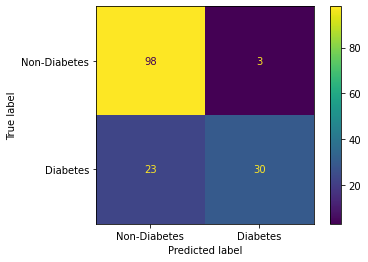

In [27]:
L1_lr = LogisticRegression(solver = 'saga', penalty = 'l1',C = 1/0.1, random_state=0)
L1_lr.fit(X_train_RS, y_train)
test_loss = log_loss(y_test,L1_lr.predict_proba(X_test_RS))
print('L1-regularized logistic regression model')
print('Loss of Test Set:',test_loss)
print('F1 Score:',f1_score(y_test,L1_lr.predict(X_test_RS)))
print('Accuracy:',accuracy_score(y_test,L1_lr.predict(X_test_RS)))

print("Confusion_matrix:")
plot_confusion_matrix(L1_lr,X_test_RS, y_test, values_format='d',display_labels=['Non-Diabetes','Diabetes'])
plt.show()

In [28]:
y_test

0      0
1      1
2      1
3      0
4      1
      ..
149    0
150    1
151    0
152    1
153    0
Name: Outcome, Length: 154, dtype: int64

In [29]:
L1_lr.predict_proba(X_test_RS)

array([[0.9954939 , 0.0045061 ],
       [0.83001376, 0.16998624],
       [0.21256194, 0.78743806],
       [0.12326269, 0.87673731],
       [0.37189344, 0.62810656],
       [0.43423045, 0.56576955],
       [0.95127049, 0.04872951],
       [0.76091045, 0.23908955],
       [0.51824472, 0.48175528],
       [0.89326715, 0.10673285],
       [0.2854137 , 0.7145863 ],
       [0.72276868, 0.27723132],
       [0.59240841, 0.40759159],
       [0.81928852, 0.18071148],
       [0.86761234, 0.13238766],
       [0.29003458, 0.70996542],
       [0.22732871, 0.77267129],
       [0.65447776, 0.34552224],
       [0.56960676, 0.43039324],
       [0.83721968, 0.16278032],
       [0.30561082, 0.69438918],
       [0.86244179, 0.13755821],
       [0.68126809, 0.31873191],
       [0.7871254 , 0.2128746 ],
       [0.58079405, 0.41920595],
       [0.70730132, 0.29269868],
       [0.82656846, 0.17343154],
       [0.9602088 , 0.0397912 ],
       [0.82174322, 0.17825678],
       [0.09850829, 0.90149171],
       [0.

In [30]:
L1_lr.predict_proba(X_test_RS).shape

(154, 2)

In [31]:
L1_lr.predict(X_test_RS)

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [32]:
L1_lr.predict(X_test_RS).shape

(154,)

### L2-regularized logistic regression model

L2-regularized logistic regression model
Loss of Test Set: 0.46581199134578033
F1 Score: 0.6976744186046512
Accuracy: 0.8311688311688312
Confusion_matrix:


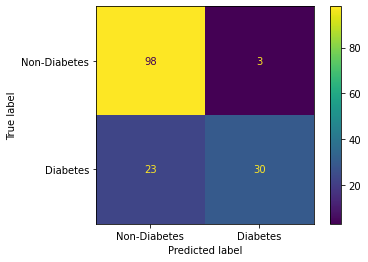

In [28]:
L2_lr = LogisticRegression(solver = 'saga', penalty = 'l2',C = 1/0.1, random_state=1)
L2_lr.fit(X_train_RS, y_train)
test_loss = log_loss(y_test,L2_lr.predict_proba(X_test_RS))
print('L2-regularized logistic regression model')
print('Loss of Test Set:',test_loss)
print('F1 Score:',f1_score(y_test,L2_lr.predict(X_test_RS)))
print('Accuracy:',accuracy_score(y_test,L2_lr.predict(X_test_RS)))

print("Confusion_matrix:")
plot_confusion_matrix(L2_lr,X_test_RS, y_test, values_format='d',display_labels=['Non-Diabetes','Diabetes'])
plt.show()

### Elastic Net-regularized logistic regression model

Elastic Net-regularized logistic regression model
Loss of Test Set: 0.46578004488033176
F1 Score: 0.6976744186046512
Accuracy: 0.8311688311688312
Confusion_matrix:


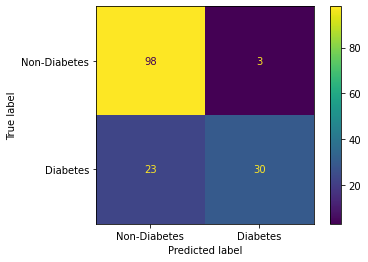

In [29]:
EN_lr = LogisticRegression(solver = 'saga', penalty = 'elasticnet', l1_ratio = 0.5, C = 1/0.1, random_state=2)
EN_lr.fit(X_train_RS, y_train)
test_loss = log_loss(y_test,EN_lr.predict_proba(X_test_RS))
print('Elastic Net-regularized logistic regression model')
print('Loss of Test Set:',test_loss)
print('F1 Score:',f1_score(y_test,EN_lr.predict(X_test_RS)))
print('Accuracy:',accuracy_score(y_test,EN_lr.predict(X_test_RS)))

print("Confusion_matrix:")
plot_confusion_matrix(EN_lr,X_test_RS, y_test, values_format='d',display_labels=['Non-Diabetes','Diabetes'])
plt.show()

## Among L2, L1, and Elastic-Net regularized logistic regression models, accuracy and F1 score of these three models are same but L1-regularized logistic regression model has smallest Loss of Test Set. As a result, the best performing logistic regression model is L1-regularized logistic regression model.

# 8 - Use a Naïve Bayes model to classify the locations below as either New Hampshire (NH) or Vermont.

## Without Laplacian smoothing:

### Probability of each class:
$$ \large P(Vermont) = \frac{N_{Vermont}}{(N_{Vermont} + N_{New Hampshire})} = \frac{2}{2+3} = 0.4$$

$$ \large P(New Hampshire) = \frac{N_{New Hampshire}}{(N_{Vermont} + N_{New Hampshire})} = \frac{3}{2+3} = 0.6$$

#### States in the dictionary of train set: Burlington, Rutland, Springfield, Lebanon, Hanover, White River Junction (WRJ), Hartford, Shelburne, Concord, Nashua, Lyme, Claremont

$$ \small P(Springfield|Vermont)= \frac{N(Springfield,Vermont)}{N(Burlington,Vermont)+N(Rutland,Vermont)+N(Springfield,Vermont)+N(Lebanon,Vermont)+N(Hanover,Vermont)+N(White River Junction,Vermont)+N(Hartford,Vermont)+N(Shelburne,Vermont)+N(Concord,Vermont)+N(Nashua,Vermont)+N(Lyme,Vermont)+N(Claremont,Vermont)}$$ 
$$\small = \frac{1}{1+1+1+0+0+1+1+1+0+0+0+0} = \frac{1}{6} = 0.17$$

$$ \small P(Shelburne|Vermont)= \frac{N(Shelburne,Vermont)}{N(Burlington,Vermont)+N(Rutland,Vermont)+N(Springfield,Vermont)+N(Lebanon,Vermont)+N(Hanover,Vermont)+N(White River Junction,Vermont)+N(Hartford,Vermont)+N(Shelburne,Vermont)+N(Concord,Vermont)+N(Nashua,Vermont)+N(Lyme,Vermont)+N(Claremont,Vermont)}$$ 
$$\small= \frac{1}{1+1+1+0+0+1+1+1+0+0+0+0} = \frac{1}{6} = 0.17$$

$$ \small P(Manchester|Vermont)= \frac{N(Manchester,Vermont)}{N(Burlington,Vermont)+N(Rutland,Vermont)+N(Springfield,Vermont)+N(Lebanon,Vermont)+N(Hanover,Vermont)+N(White River Junction,Vermont)+N(Hartford,Vermont)+N(Shelburne,Vermont)+N(Concord,Vermont)+N(Nashua,Vermont)+N(Lyme,Vermont)+N(Claremont,Vermont)}$$ 
$$\small= \frac{0}{1+1+1+0+0+1+1+1+0+0+0+0} = \frac{0}{6} = 0$$

$$ \small P(Springfield|NH)= \frac{N(Springfield,NH)}{N(Burlington,NH)+N(Rutland,NH)+N(Springfield,NH)+N(Lebanon,NH)+N(Hanover,NH)+N(WRJ,NH)+N(Hartford,NH)+N(Shelburne,NH)+N(Concord,NH)+N(Nashua,NH)+N(Lyme,NH)+N(Claremont,NH)}$$ 
$$\small= \frac{2}{0+0+2+1+1+0+0+1+1+1+1+1} = \frac{2}{9} = 0.22$$

$$ \small P(Shelburne|NH)= \frac{N(Shelburne,NH)}{N(Burlington,NH)+N(Rutland,NH)+N(Springfield,NH)+N(Lebanon,NH)+N(Hanover,NH)+N(WRJ,NH)+N(Hartford,NH)+N(Shelburne,NH)+N(Concord,NH)+N(Nashua,NH)+N(Lyme,NH)+N(Claremont,NH)}$$ 
$$\small= \frac{1}{0+0+2+1+1+0+0+1+1+1+1+1} = \frac{1}{9} = 0.11$$

$$ \small P(Manchester|NH)= \frac{N(Manchester,NH)}{N(Burlington,NH)+N(Rutland,NH)+N(Springfield,NH)+N(Lebanon,NH)+N(Hanover,NH)+N(WRJ,NH)+N(Hartford,NH)+N(Shelburne,NH)+N(Concord,NH)+N(Nashua,NH)+N(Lyme,NH)+N(Claremont,NH)}$$ 
$$\small= \frac{0}{0+0+2+1+1+0+0+1+1+1+1+1} = \frac{0}{9} = 0$$

### Classifying New Document:
$$ \small P(Springfield, Shelburne, Manchester|Vermont)= P(Springfield|Vermont)P(Shelburne|Vermont)P(Manchester|Vermont)= 0.17x0.17x0 = 0$$

$$ \small P(Springfield, Shelburne, Manchester|NH)= P(Springfield|NH)P(Shelburne|NH)P(Manchester|NH)= 0.22x0.11x0 = 0$$

Posterior Probability:
$$\small P(Vermont|Springfield, Shelburne, Manchester)=\frac{P(Springfield, Shelburne, Manchester|Vermont)xP(Vermont)}{P(Springfield, Shelburne, Manchester)}=\frac{0x0.4}{P(Springfield, Shelburne, Manchester)} = 0 $$

$$\small P(NH|Springfield, Shelburne, Manchester)=\frac{P(Springfield, Shelburne, Manchester|NH)xP(NH)}{P(Springfield, Shelburne, Manchester)}=\frac{0x0.6}{P(Springfield, Shelburne, Manchester)} = 0 $$

Classification decision:
$$\small\frac{P(Vermont|Springfield, Shelburne, Manchester)}{P(NH|Springfield, Shelburne, Manchester)} = \frac{0}{0}$$
#### So {Springfield, Shelburne, Manchester} could not be classified as any State

## With Laplacian smoothing:

### Probability of each class:
$$ \large P(Vermont) = \frac{N_{Vermont}}{(N_{Vermont} + N_{New Hampshire})} = \frac{2}{2+3} = 0.4$$

$$ \large P(New Hampshire) = \frac{N_{New Hampshire}}{(N_{Vermont} + N_{New Hampshire})} = \frac{3}{2+3} = 0.6$$

#### States in the dictionary of train set: Burlington, Rutland, Springfield, Lebanon, Hanover, White River Junction (WRJ), Hartford, Shelburne, Concord, Nashua, Lyme, Claremont

$$ \small P(Springfield|Vermont)= \frac{N(Springfield,Vermont)}{N(Burlington,Vermont)+N(Rutland,Vermont)+N(Springfield,Vermont)+N(Lebanon,Vermont)+N(Hanover,Vermont)+N(White River Junction,Vermont)+N(Hartford,Vermont)+N(Shelburne,Vermont)+N(Concord,Vermont)+N(Nashua,Vermont)+N(Lyme,Vermont)+N(Claremont,Vermont)}$$ 
$$\small = \frac{1+1}{2+2+2+1+1+2+2+2+1+1+1+1} = \frac{2}{18}$$

$$ \small P(Shelburne|Vermont)= \frac{N(Shelburne,Vermont)}{N(Burlington,Vermont)+N(Rutland,Vermont)+N(Springfield,Vermont)+N(Lebanon,Vermont)+N(Hanover,Vermont)+N(White River Junction,Vermont)+N(Hartford,Vermont)+N(Shelburne,Vermont)+N(Concord,Vermont)+N(Nashua,Vermont)+N(Lyme,Vermont)+N(Claremont,Vermont)}$$ 
$$\small= \frac{1+1}{2+2+2+1+1+2+2+2+1+1+1+1} = \frac{2}{18}$$

$$ \small P(Manchester|Vermont)= \frac{N(Manchester,Vermont)}{N(Burlington,Vermont)+N(Rutland,Vermont)+N(Springfield,Vermont)+N(Lebanon,Vermont)+N(Hanover,Vermont)+N(White River Junction,Vermont)+N(Hartford,Vermont)+N(Shelburne,Vermont)+N(Concord,Vermont)+N(Nashua,Vermont)+N(Lyme,Vermont)+N(Claremont,Vermont)}$$ 
$$\small= \frac{0+1}{2+2+2+1+1+2+2+2+1+1+1+1} = \frac{1}{18}$$

$$ \small P(Springfield|NH)= \frac{N(Springfield,NH)}{N(Burlington,NH)+N(Rutland,NH)+N(Springfield,NH)+N(Lebanon,NH)+N(Hanover,NH)+N(WRJ,NH)+N(Hartford,NH)+N(Shelburne,NH)+N(Concord,NH)+N(Nashua,NH)+N(Lyme,NH)+N(Claremont,NH)}$$ 
$$\small= \frac{2+1}{1+1+3+2+2+1+1+2+2+2+2+2} = \frac{3}{21}$$

$$ \small P(Shelburne|NH)= \frac{N(Shelburne,NH)}{N(Burlington,NH)+N(Rutland,NH)+N(Springfield,NH)+N(Lebanon,NH)+N(Hanover,NH)+N(WRJ,NH)+N(Hartford,NH)+N(Shelburne,NH)+N(Concord,NH)+N(Nashua,NH)+N(Lyme,NH)+N(Claremont,NH)}$$ 
$$\small= \frac{1+1}{1+1+3+2+2+1+1+2+2+2+2+2} = \frac{2}{21}$$

$$ \small P(Manchester|NH)= \frac{N(Manchester,NH)}{N(Burlington,NH)+N(Rutland,NH)+N(Springfield,NH)+N(Lebanon,NH)+N(Hanover,NH)+N(WRJ,NH)+N(Hartford,NH)+N(Shelburne,NH)+N(Concord,NH)+N(Nashua,NH)+N(Lyme,NH)+N(Claremont,NH)}$$ 
$$\small= \frac{0+1}{1+1+3+2+2+1+1+2+2+2+2+2} = \frac{1}{21}$$

### Classifying New Document:
$$ \small P(Springfield, Shelburne, Manchester|Vermont)= P(Springfield|Vermont)P(Shelburne|Vermont)P(Manchester|Vermont)= \frac{2}{18}x\frac{2}{18}x\frac{1}{18} = 0.0006858711$$

$$ \small P(Springfield, Shelburne, Manchester|NH)= P(Springfield|NH)P(Shelburne|NH)P(Manchester|NH)= \frac{3}{21}x\frac{2}{21}x\frac{1}{21} = 0.0006478782$$

Posterior Probability:
$$\small P(Vermont|Springfield, Shelburne, Manchester)=\frac{P(Springfield, Shelburne, Manchester|Vermont)xP(Vermont)}{P(Springfield, Shelburne, Manchester)}=\frac{0.0006858711x0.4}{P(Springfield, Shelburne, Manchester)}$$

$$\small P(NH|Springfield, Shelburne, Manchester)=\frac{P(Springfield, Shelburne, Manchester|NH)xP(NH)}{P(Springfield, Shelburne, Manchester)}=\frac{0.0006478782x0.6}{P(Springfield, Shelburne, Manchester)}$$

Classification decision:
$$\small\frac{P(Vermont|Springfield, Shelburne, Manchester)}{P(NH|Springfield, Shelburne, Manchester)} = \frac{0.0006858711x0.4}{0.0006478782x0.6} = 0.7057614 < 1$$
#### So {Springfield, Shelburne, Manchester} is classified as New Hampshire.